<a href="https://colab.research.google.com/github/from-iqwerty-import-IQ/Deep_Learning_Projects/blob/main/Mask%20Protocal%20Violation%20/mask_violation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import os 
os.environ['KAGGLE_CONFIG_DIR'] = '/content'


In [26]:
!kaggle datasets download -d alfaromeo676/face-mask-dataset


100% 17.6G/17.6G [03:21<00:00, 35.5MB/s]
100% 17.6G/17.6G [03:21<00:00, 93.8MB/s]


In [27]:
%%capture
!unzip \*.zip && rm *.zip &> /dev/null

In [29]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.applications import ResNet50
from sklearn.preprocessing import LabelBinarizer

In [30]:
training_dir = '/content/train'
test_dir = '/content/Mask dataset/test'

In [53]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   
                                   validation_split = 0.25)

In [40]:
"""
rotation_range = 40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip=True,"""

'\nrotation_range = 40,\n                                   width_shift_range=0.2,\n                                   height_shift_range=0.2,\n                                   shear_range=0.2,\n                                   zoom_range = 0.2,\n                                   horizontal_flip=True,'

In [54]:
train_genrator = train_datagen.flow_from_directory(
    training_dir,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'categorical',
    subset='training',
    

)

validate_genrator = train_datagen.flow_from_directory(
    training_dir,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'categorical',
    subset='validation',
    
)

Found 22789 images belonging to 3 classes.
Found 7595 images belonging to 3 classes.


In [55]:
model = models.Sequential()

model.add(layers.Conv2D(64,(3,3),input_shape=(224,224,3),activation='relu'))
model.add(layers.MaxPool2D(2,2))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D(2,2))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D(2,2))

model.add(layers.Conv2D(512,(3,3),activation='relu'))
model.add(layers.MaxPool2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dropout(0.3))

model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(3,activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 111, 111, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 109, 109, 64)      36928     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 26, 26, 128)     

In [56]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
              metrics = ['acc'],
               loss=tf.keras.losses.CategoricalCrossentropy())


In [57]:
check_point = tf.keras.callbacks.ModelCheckpoint(filepath="/content/transfer_l_mode.h5",
                                         monitor="val_acc",
                                         mode="max",
                                         save_best_only=True,)

#8early_stopping = tf.keras.callback.EarlyStopping(patience=5, verbose=1)

In [58]:
trained_model = model.fit(
    train_genrator,
    validation_data= validate_genrator,
    epochs = 2,
    #steps_per_epoch=100,
    #validation_steps=33,
    callbacks = [check_point]
    )

Epoch 1/2
713/713 [==============================] - 888s 1s/step - loss: 0.0713 - acc: 0.9752 - val_loss: 0.0194 - val_acc: 0.9941
Epoch 2/2
713/713 [==============================] - 883s 1s/step - loss: 0.0185 - acc: 0.9955 - val_loss: 0.0073 - val_acc: 0.9975


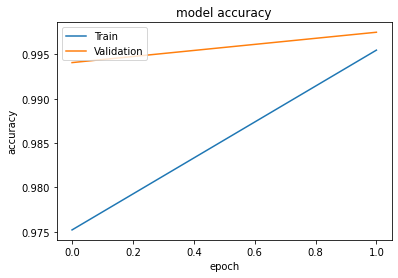

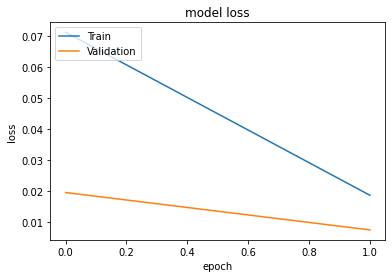

In [59]:
plt.plot(trained_model.history['acc'])
plt.plot(trained_model.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(trained_model.history['loss'])
plt.plot(trained_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [60]:
model.evaluate(validate_genrator)

238/238 [==============================] - 208s 874ms/step - loss: 0.0073 - acc: 0.9975


[0.007326568476855755, 0.9974983334541321]

AttributeError: ignored

# Unknown data 

In [61]:
!kaggle datasets download -d vijaykumar1799/face-mask-detection

 98% 217M/222M [00:05<00:00, 33.4MB/s]
100% 222M/222M [00:05<00:00, 42.8MB/s]


In [62]:
%%capture
!unzip \*.zip && rm *.zip &> /dev/null

In [63]:
test_dir = '/content/Dataset'

In [64]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [65]:
test_genrator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (224,224),
    batch_size = 20,
    class_mode = 'categorical',
    #subset='validation',
    
)

Found 8982 images belonging to 3 classes.


In [66]:
model.evaluate(test_genrator)

450/450 [==============================] - 16s 35ms/step - loss: 6.4194 - acc: 0.3952


[6.419381618499756, 0.3952349126338959]

In [ ]:
model.save("/content/mask_detection_open.h5")

In [68]:
!wget 'https://i.mmo.cm/is/image/mmoimg/mw-product-zoom/mephisto-half-mask-black--mw-117541-2.jpg'

--2021-12-30 06:17:07--  https://i.mmo.cm/is/image/mmoimg/mw-product-zoom/mephisto-half-mask-black--mw-117541-2.jpg
Resolving i.mmo.cm (i.mmo.cm)... 104.110.240.96, 104.110.240.130, 2a02:26f0:b200::58dd:1913, ...
Connecting to i.mmo.cm (i.mmo.cm)|104.110.240.96|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 145876 (142K) [image/jpeg]
Saving to: ‘mephisto-half-mask-black--mw-117541-2.jpg’

mephisto-half-mask- 100%[===================>] 142.46K  --.-KB/s    in 0.01s   

2021-12-30 06:17:07 (12.0 MB/s) - ‘mephisto-half-mask-black--mw-117541-2.jpg’ saved [145876/145876]



In [70]:
from keras.preprocessing import image

In [74]:
img = input()

/content/mephisto-half-mask-black--mw-117541-2.jpg


[[1.000000e+00 0.000000e+00 4.258858e-08]]


'improper mask '

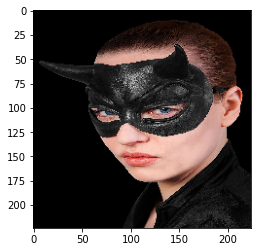

In [75]:
img = image.load_img(img, target_size=(224, 224,3))
plt.imshow(img)
img = np.expand_dims(img, axis=0)
pre = model.predict(img)
print(pre)
class_name = ['improper mask ','no mask',' mask']
class_name[np.argmax(pre)]